<a href="https://colab.research.google.com/github/Michalinh0/genetic_algorithm_graph/blob/main/graph_genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [31]:
!pip install pygad
import pygad
!git clone https://github.com/Michalinh0/genetic_algorithm_graph.git
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'genetic_algorithm_graph' already exists and is not an empty directory.


## Set up a graph

In [6]:
with open('genetic_algorithm_graph/graph.txt') as file:
    lines = file.readlines()
#with open('genetic_algorithm_graph/graph2.txt') as file:
#    lines = file.readlines()
#with open('genetic_algorithm_graph/graph3.txt') as file:
#    lines = file.readlines()
lines = [line.strip() for line in lines]
print(lines)

['4', '1 3 1 4 2 3 2 4']


In [15]:
vertices_count = int(lines[0])
print(vertices_count)
print(lines)
edges = list()
edges_count = int(len(lines[1]) / 2)
for i in range(edges_count):
  edges.append((lines[1][2*i] , lines[1][2*i + 1]))
print(edges)

4
['4', ['1', '3', '1', '4', '2', '3', '2', '4']]
[('1', '3'), ('1', '4'), ('2', '3'), ('2', '4')]


# Fitness function

In [20]:
def segment(p1 , p2 , p3):
  if(p2[0] <= max(p1[0] , p3[0])) and (p2[0] >= min(p1[0] , p3[0])) and (p2[1] <= max(p1[1] , p3[1])) and (p2[1] >= min(p1[1] , p3[1])):
    return True
  return False

In [19]:
def orientation(p1 , p2 , p3):
  value = (p2[1] - p1[1] ) * (p3[0] - p2[0]) - (p2[0] - p1[0] * p3[1] - p2[1])
  if value > 0:
    return 1
  if value < 0:
    return 2
  return 0

In [28]:
def cross(edge1 , edge2 , vertices):
  A = vertices[int(edge1[0]) - 1]
  B = vertices[int(edge1[1]) - 1]
  C = vertices[int(edge2[0]) - 1]
  D = vertices[int(edge2[1]) - 1]

  orientation1 = orientation(A,B,C)
  orientation2 = orientation(A,B,D)
  orientation3 = orientation(C,D,A)
  orientation4 = orientation(C,D,B)

  if orientation1 != orientation2 and orientation3 != orientation4:
    return True
  if orientation1 == 0 and segment(A,C,B):
    return True
  if orientation2 == 0 and segment(A,D,B):
    return True
  if orientation3 == 0 and segment(C,A,D):
    return True
  if orientation4 == 0 and segment(C,B,D):
    return True
  return False
  

In [21]:
def fitness(solution, solution_idx):
  vertices = list()
  for i in range(vertices_count):
    vertices.append((solution[2*i] , solution[2*i+1]))
  fitness = 2 * edges_count * (edges_count - 1)
  for edge in edges:
    for edge2 in edges:
      if edge == edge2:
        continue
      if edge[0] == edge2[0] or edge[0] == edge2[1] or edge[1] == edge2[0] or edge[1] == edge2[1]:
        continue
      if cross(edge , edge2 , vertices):
          fitness -= 1
  return fitness
      

# Genetic algorithm using Pygad

In [22]:
fitness_function = fitness

num_generations = 150
num_parents_mating = 32

sol_per_pop = 32
num_genes = 2*vertices_count

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_num_genes = 1

In [33]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=mutation_num_genes)

ga_instance.run()

[ 1.24793275  1.02537855 -0.619253   -0.40833118 -2.42393425  0.59752584
  0.28872398  1.64825133] 24


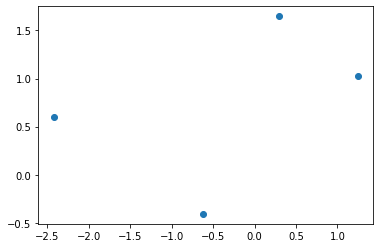

In [40]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
x = list()
y = list()
for i in range(vertices_count):
  x.append(solution[2*i])
  y.append(solution[2*i + 1])
print(solution , solution_fitness)
plt.scatter(x,y)